<a href="https://colab.research.google.com/github/Konstantin5054232/ausbildungsprojekte/blob/main/05_computerspielen_verkaufen/computerspielen_verkaufen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marktforschung für Computerspiele

Aus offenen Quellen haben wir Zugriff auf historische Daten zu Spieleverkäufen, Benutzer- und Expertenbewertungen, Genres und Plattformen (z. B. Xbox oder PlayStation). Wir müssen Muster identifizieren, die den Erfolg des Spiels bestimmen. Dies ermöglicht es uns, auf ein potenziell beliebtes Produkt zu bieten und Werbekampagnen zu planen.

## Datenexploration

In [33]:
# Wir importieren die notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [34]:
# Wir laden Tabellen mit Daten
data = pd.read_csv('/content/games.csv')

In [35]:
# Wir werden die erhaltenen Daten studieren
display(data.info())
display(data.shape)
display(data.head())
display(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

(16715, 11)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [37]:
# Wir werden sehen, welche Werte und in welcher Menge in den einzelnen Spalten der Tabelle stehen.
for column in data.columns:
    display(data[column].value_counts())

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: NA_sales, Length: 402, dtype: int64

0.00     5870
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: EU_sales, Length: 307, dtype: int64

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: JP_sales, Length: 244, dtype: int64

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: Other_sales, Length: 155, dtype: int64

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: Critic_Score, Length: 82, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

**Schlussfolgerungen**

Wir können sehen, dass die Spalte mit Informationen zum Erscheinungsjahr das falsche Format hat. Die Jahreszahl kann nur eine Ganzzahl sein. Die Daten in der Spalte Kritikerpunktzahl enthalten eine Null nach dem Dezimalkomma. Offensichtlich sind diese Schätzungen ganze Zahlen. Die Daten in der Benutzerbewertungsspalte sind im Objektformat, das keine Berechnungen zulässt. Eine kleine Anzahl von Zeilen enthält keine Informationen über das Erscheinungsjahr des Spiels, Titel und Genre. Eine beträchtliche Datenmenge hat Nullwerte in den Spalten Critic_Score, User_Score, Rating.

Wir können sehen, dass die größte Anzahl von Werten in der Spalte User_Score tbd ist, was bedeutet, dass die Daten definiert werden müssen.

## Datenvorverarbeitung

In [38]:
# Wir werden die Anzahl der Duplikate mit einer Reihe von Methoden zählen data.duplicated().sum().
print(data.duplicated().sum())

0


In [39]:
# Wir werden die Spaltennamen ersetzen (Kleinbuchstaben).
data.columns = map(str.lower, data.columns)

In [40]:
# Wir werden die Zeilen entfernen, in denen der Name und das Erscheinungsjahr des Spiels fehlen.
data.dropna(subset = ['year_of_release'], inplace = True)
data.dropna(subset = ['name'], inplace = True)

In [41]:
# Wir werden die Abkürzung tbd durch NaN ersetzen.
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [42]:
# Wir werden die fehlenden Werte in den Spalten „critic_score“ und „user_score“ durch den Median nach Genretyp ersetzen.
for genre in data['genre'].unique():
    median = data.loc[data['genre'] == genre, 'critic_score'].median()
    data.loc[(data['genre'] == genre) & (data['critic_score'].isna()), 'critic_score'] = median

    median = data.loc[data['genre'] == genre, 'user_score'].median()
    data.loc[(data['genre'] == genre) & (data['user_score'].isna()), 'user_score'] = median

In [43]:
# Wir konvertieren Datentypen.
data = data.astype({ "year_of_release": "int", "critic_score": "int"})

In [44]:
# Wir werden den Gesamtumsatz in allen Regionen berechnen und in eine separate Spalte schreiben.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [45]:
# Mal sehen was passiert.
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.7,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.8,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


**Schlussfolgerungen**

Keine Duplikate gefunden. Wir haben den Datentyp in den Spalten year_of_release geändert, weil das Jahr wird nur durch eine Ganzzahl angegeben, und der Kritiker_Wert seit Beim Studium der erhaltenen Daten stellten sie fest, dass die Bewertung der Kritiker immer als ganze Zahl ausgedrückt wird.

Wir haben Zeilen mit fehlenden Daten entfernt, was die Ergebnisse der Analyse nicht wesentlich beeinflussen kann.

Eine beträchtliche Datenmenge hat Nullwerte in den Spalten Critic_Score, User_Score, Rating. Wir werden diese Zeilen nicht entfernen. Wir haben die Mittelwerte und Mediane für die angegebenen Spalten berechnet. Diese Indikatoren unterscheiden sich geringfügig, daher wurde in beiden Fällen der Median gewählt, um die Nullwerte auszufüllen.

Die größte Anzahl von Werten in der Spalte User_Score ist tbd. Tatsächlich bedeutet dies keine Daten, daher wurde die angegebene Abkürzung durch NaN ersetzt.

Wir haben die Gesamtumsätze in allen Regionen berechnet und in einer eigenen Spalte erfasst.

## Explorative Datenanalyse

In [46]:
# Wir werden sehen, wie viele Spiele in verschiedenen Jahren veröffentlicht wurden.
data.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

In [47]:
# Wir werden eine Rangliste der Plattformen nach Verkaufsvolumen erstellen.
platform_sales = data.pivot_table(index=['platform'], values='total_sales', 
                                       aggfunc='sum').sort_values(by='total_sales', ascending = False)
platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [48]:
# Wir werden Plattformen mit einem Verkaufsvolumen von mehr als 100 Millionen Exemplaren auswählen.
platform_sales_top = platform_sales[platform_sales['total_sales'] > 100]
platform_sales_top

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [49]:
# Wir werden eine Tabelle erstellen, in der Plattformen nach 2001 entwickelt und 
# Kopien davon mehr als 100 Millionen Mal verkauft wurden.
data_top = data.query("year_of_release >= 2001 and platform in @platform_sales_top.index")
data_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


In [50]:
# Wir werden eine Verteilungstabelle nach Jahren des Verkaufsvolumens der Top-Plattformen erstellen.
data_platform_sales_top = data_top.pivot_table(index=['year_of_release'], 
                                         columns = ['platform'], values='total_sales', aggfunc='count')
display(data_platform_sales_top)
data_platform_sales_top.info()

platform,3DS,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2001,NaN,NaN,10.0,107.0,22.0,9.0,15.0,91.0,185.0,NaN,NaN,NaN,NaN,NaN,33.0,NaN
2002,NaN,NaN,NaN,198.0,152.0,1.0,19.0,20.0,280.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN
2003,NaN,NaN,NaN,150.0,144.0,NaN,33.0,3.0,256.0,NaN,NaN,NaN,NaN,NaN,189.0,NaN
2004,NaN,23.0,NaN,175.0,83.0,NaN,30.0,NaN,259.0,NaN,NaN,15.0,NaN,NaN,177.0,NaN
2005,NaN,118.0,NaN,135.0,97.0,NaN,37.0,NaN,260.0,NaN,NaN,95.0,NaN,18.0,179.0,NaN
2006,NaN,201.0,NaN,39.0,40.0,NaN,52.0,NaN,259.0,27.0,NaN,189.0,44.0,93.0,62.0,NaN
2007,NaN,376.0,NaN,6.0,4.0,NaN,62.0,NaN,214.0,90.0,NaN,133.0,185.0,123.0,3.0,NaN
2008,NaN,492.0,NaN,NaN,NaN,NaN,76.0,NaN,191.0,138.0,NaN,100.0,282.0,146.0,1.0,NaN
2009,NaN,403.0,NaN,NaN,NaN,NaN,107.0,NaN,96.0,162.0,NaN,161.0,325.0,172.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2001 to 2016
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3DS     6 non-null      float64
 1   DS      10 non-null     float64
 2   GB      1 non-null      float64
 3   GBA     7 non-null      float64
 4   GC      7 non-null      float64
 5   N64     2 non-null      float64
 6   PC      16 non-null     float64
 7   PS      3 non-null      float64
 8   PS2     11 non-null     float64
 9   PS3     11 non-null     float64
 10  PS4     4 non-null      float64
 11  PSP     12 non-null     float64
 12  Wii     11 non-null     float64
 13  X360    12 non-null     float64
 14  XB      8 non-null      float64
 15  XOne    4 non-null      float64
dtypes: float64(16)
memory usage: 2.1 KB


**Definition der aktuellen Periode**

Nachdem wir die obige Pivot-Tabelle sowie Informationen über die Pivot-Tabelle analysiert haben und die Anzahl der Nicht-Null-Werte für jede Plattform sehen, können wir daraus schließen, dass der charakteristische und tatsächliche Zeitraum des Bestehens der Plattform 5 Jahre beträgt.

**Schlussfolgerungen**

Wir haben festgestellt, wie viele Spiele in verschiedenen Jahren veröffentlicht wurden, wir können daraus schließen, dass Daten ab 2001 für die Analyse wichtig sind. Wir haben eine Rangliste der Plattformen nach Verkaufsvolumen erstellt. Die beliebtesten sind PS2, X360, PS3, Wii, DS, wir haben Plattformen mit Verkäufen von mehr als 100 Millionen Exemplaren ausgewählt, die für uns interessant sind, zu analysieren. Wir sehen, dass der charakteristische Zeitraum für das Erscheinen neuer und das Verschwinden alter Plattformen 5 Jahre beträgt.

In [51]:
# Wir nehmen Daten für den aktuellen Zeitraum - 5 Jahre.
data_actual = data.query("year_of_release >= 2012")
data_actual_pivot = data_actual.pivot_table(index=['year_of_release'], 
                                         columns = ['platform'], values='total_sales', aggfunc='sum')
data_actual_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


**Schlussfolgerungen**

Wir haben eine Tabelle zusammengestellt, in der Plattformen nach 2012 entwickelt und von denen mehr als 100 Millionen Exemplare verkauft wurden, sowie eine Verteilungstabelle nach Jahren des Verkaufsvolumens der Top-Plattformen. Aus der zusammenfassenden Tabelle für den aktuellen Zeitraum ist ersichtlich, dass die wachsende Plattform die XOne-Plattform und möglicherweise die PS4- und WiiU-Plattformen sind, falls die Daten für 2016 nicht vollständig sind. Diese Plattformen können als potenziell profitabel angesehen werden. Der Umsatzrückgang wird auf den Plattformen PS3, 3DS, Wii, X360 beobachtet.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0, 'Plattformen')

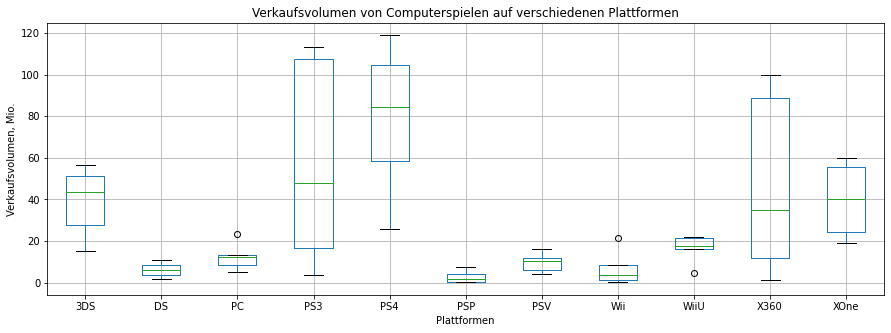

In [52]:
# Wir zeichnen ein Box-and-Whisker-Diagramm für alle Plattformen über den aktuellen Zeitraum.
data_actual_pivot.boxplot(figsize=(15,5)).set_title('Verkaufsvolumen von Computerspielen auf verschiedenen Plattformen')
plt.ylabel('Verkaufsvolumen, Mio.')
plt.xlabel('Plattformen')

**Schlussfolgerungen**

Im Box- und Schnurrbart-Diagramm sehen wir den höchsten Median (etwa 85) und eine signifikante Streuung über die PS4-Plattform. Daten mit einer signifikanten Feldgröße weisen darauf hin, dass die Plattform nicht mehr verwendet wird oder nicht mehr existiert, z. B. PS3, X360.

In [53]:
#Wir werden sehen, wie sich die Bewertungen von Benutzern und Kritikern auf den Umsatz innerhalb einer beliebten Plattform auswirken.

# Wir werden eine Tabelle für die X360-Plattform generieren.
data_X360 = data_actual[data_actual['platform'] == 'X360']
data_X360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,69,7.1,NaN,9.18


In [55]:
# Wir werden eine zusammenfassende Tabelle für die X360-Plattform erstellen und die Summe der Verkäufe und 
# Bewertungen von Kritikern und Benutzern zählen.
data_X360_pivot = data_X360.pivot_table(index=['year_of_release'], values=['total_sales', 'critic_score', 'user_score'], 
                                                                           aggfunc=['sum', 'mean'])
data_X360_pivot

sum                                mean              \
                critic_score total_sales user_score critic_score total_sales   
year_of_release                                                                
2012                    7624       99.74      708.6    71.924528    0.940943   
2013                    5354       88.58      488.4    71.386667    1.181067   
2014                    4254       34.74      394.3    67.523810    0.551429   
2015                    2460       11.96      219.8    70.285714    0.341714   
2016                     931        1.52       73.8    71.615385    0.116923   

                            
                user_score  
year_of_release             
2012              6.684906  
2013              6.512000  
2014              6.258730  
2015              6.280000  
2016              5.676923

In [56]:
# Wir werden die Spalten umbenennen und die nicht benötigten löschen.
data_X360_pivot.columns = ['sum_critic_score', 'sum_total_sales', 'sum_user_score', 
                           'mean_critic_score', 'mean_total_sales', 'mean_user_score']

data_X360_pivot.drop(['sum_critic_score', 'sum_user_score', 'mean_total_sales'], axis = 1, inplace = True)
display(data_X360_pivot)

,sum_total_sales,mean_critic_score,mean_user_score
year_of_release,,,
2012,99.74,71.924528,6.684906
2013,88.58,71.386667,6.512000
2014,34.74,67.523810,6.258730
2015,11.96,70.285714,6.280000
2016,1.52,71.615385,5.676923


0.3276874822635175

0.8624875338061025

,sum_total_sales,mean_critic_score,mean_user_score
sum_total_sales,1.000000,0.327687,0.862488
mean_critic_score,0.327687,1.000000,0.062854
mean_user_score,0.862488,0.062854,1.000000


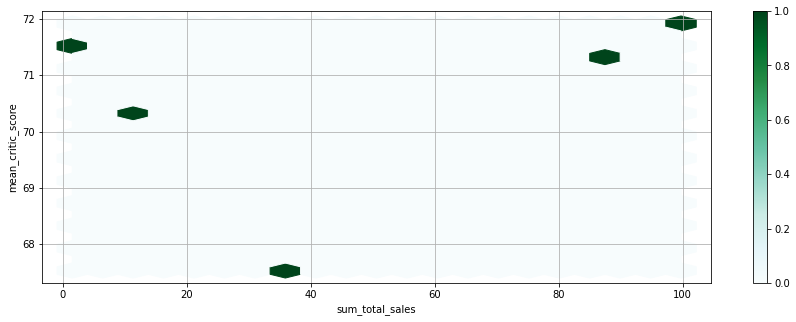

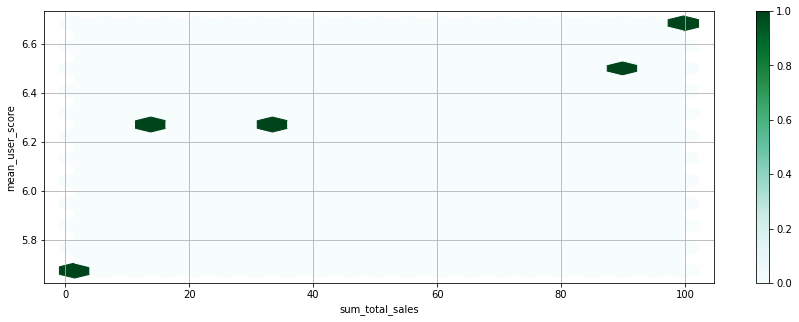

In [58]:
# Wir erstellen ein Streudiagramm und berechnen die Korrelation zwischen Bewertungen und Verkäufen auf der X360-Plattform.
data_X360_pivot.plot(x='sum_total_sales', y='mean_critic_score', kind='hexbin', gridsize=20, figsize=(15, 5), 
                     sharex=False, grid=True) 
data_X360_pivot.plot(x='sum_total_sales', y='mean_user_score', kind='hexbin', gridsize=20, figsize=(15, 5), 
                     sharex=False, grid=True) 

display(data_X360_pivot['sum_total_sales'].corr(data_X360_pivot['mean_critic_score']))
display(data_X360_pivot['sum_total_sales'].corr(data_X360_pivot['mean_user_score']))

display(data_X360_pivot.corr())

**Schlussfolgerungen**

Wir haben Streudiagramme erstellt und Korrelationskoeffizienten zwischen Bewertungen und Verkäufen für die beliebte X360-Plattform berechnet. Daraus lässt sich schließen, dass zwischen den Verkäufen von Spielen auf der Plattform und Bewertungen von Kritikern ein unbedeutender Zusammenhang besteht. Bedeutsamer ist der Zusammenhang zwischen Nutzerbewertungen und Verkaufsvolumen von Spielen auf der Plattform. Wenn Sie sich die Veränderung der Benutzerbewertungen ansehen, können Sie sehen, dass es einen stetigen Abwärtstrend gibt. Unter Berücksichtigung der Tatsache, dass die Verkäufe von Spielen auf allen untersuchten Plattformen im Allgemeinen normal verteilt sind, können diese Schlussfolgerungen auf der X360-Plattform auf andere Plattformen extrapoliert werden.

In [59]:
# Wir sehen uns die Gesamtverteilung der Spiele nach Genre und Umsatz an.
data_genre = data_actual.groupby('genre')['genre'].count().sort_values(ascending = False)
display(data_genre)

data_genre_pivot_1 = data_actual.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', 
                                                                                                      ascending = False)
display(data_genre_pivot_1)

data_genre_pivot_2 = data_actual.pivot_table(index=['genre'], values='total_sales', aggfunc='median').sort_values(by = 'total_sales', 
                                                                                                      ascending = False)
display(data_genre_pivot_2)

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


**Schlussfolgerungen**

Wir haben eine Verteilungstabelle für Spiele nach Genre erstellt. Am häufigsten kaufen Verbraucher Spiele in den Genres Action, Rollenspiel, Abenteuer, Sport, Shooter, aber die profitabelsten Spiele sind Action, Shooter, Rollenspiel, Sport, Sonstiges. Basierend auf der Einheit des Spiels werden Shooter, Sports, Platform, Role-Playing, Racing die Marktführer in Bezug auf den Umsatz.

## Erstellung eines Porträts der Benutzer jeder Region

In [62]:
# Wir werden ein Wörterbuch von Spalten mit Regionen erstellen.
regions = ['eu_sales', 'na_sales', 'jp_sales']

In [64]:
# Wir werden eine Pivot-Tabelle nach Plattform erstellen, die die Verkäufe nach Region zeigt.
data_genre_regions = data_actual.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales'], 
                                 aggfunc='sum').sort_values(by = 'na_sales', ascending = False)
data_genre_regions

,eu_sales,jp_sales,na_sales
platform,,,
X360,74.52,1.57,140.05
PS4,141.09,15.96,108.74
PS3,106.86,35.29,103.38
XOne,51.59,0.34,93.12
3DS,42.64,87.79,55.31
WiiU,25.13,13.01,38.10
PC,37.76,0.00,19.12
Wii,11.92,3.39,17.45
PSV,11.36,21.04,10.98


In [66]:
# Wir ermitteln für jede Region die Top 5 Plattformen mit den höchsten Umsätzen.
for region in regions:
    data_platform_region = data_actual.pivot_table(index=['platform'], values=region, aggfunc='sum').sort_values(by = region, 
                                                                                                          ascending = False)
    data_platform_top = data_platform_region[:5]
    data_platform_top['part_sales'] = data_platform_top[region] / data[region].sum()
    display(data_platform_top)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,eu_sales,part_sales
platform,,
PS4,141.09,0.058795
PS3,106.86,0.044531
X360,74.52,0.031054
XOne,51.59,0.021499
3DS,42.64,0.017769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,na_sales,part_sales
platform,,
X360,140.05,0.032259
PS4,108.74,0.025047
PS3,103.38,0.023812
XOne,93.12,0.021449
3DS,55.31,0.012740


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,jp_sales,part_sales
platform,,
3DS,87.79,0.068021
PS3,35.29,0.027343
PSV,21.04,0.016302
PS4,15.96,0.012366
WiiU,13.01,0.010080


In [61]:
# Wir werden eine zusammenfassende Tabelle nach Genre erstellen, die die Verkäufe nach Region angibt.
data_genre_regions = data_actual.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales'], 
                                 aggfunc='sum').sort_values(by = 'na_sales', ascending = False)
data_genre_regions

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Shooter,113.47,9.23,144.77
Sports,69.09,8.01,81.53
Role-Playing,48.53,65.44,64.00
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Fighting,10.79,9.44,19.79
Racing,27.29,2.50,17.22
Adventure,9.46,8.24,8.92


In [67]:
# Wir ermitteln für jede Region die Top 5 Genre mit den höchsten Umsätzen.
for region in regions:
    data_genre_region = data_actual.pivot_table(index=['genre'], values=region, aggfunc='sum').sort_values(by = region, 
                                                                                                    ascending = False)
    data_genre_top = data_genre_region[:5]
    display(data_genre_top)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


In [68]:
# Wir füllen die leeren Werte in der Spalte "rating" mit "undefined".
data_actual['rating'].fillna('undefined', inplace = True)
data_actual.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,7.4,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74,7.8,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [69]:
# Wir werden eine zusammenfassende Tabelle zum ESRB-Rating erstellen, die die Verkäufe nach Region angibt.
data_rating_regions = data_actual.pivot_table(index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales'], 
                                 aggfunc='sum').sort_values(by = 'na_sales', ascending = False)
data_rating_regions

,eu_sales,jp_sales,na_sales
rating,,,
M,193.96,21.20,231.57
E,113.03,28.33,114.37
undefined,91.50,108.84,103.31
E10+,55.37,8.19,75.70
T,52.96,26.02,66.02


In [71]:
# Wir bestimmen die Umsatzverteilung für jede Region gemäß dem ESRB-Rating.
for region in regions:
    data_rating_region = data_actual.pivot_table(index=['rating'], values=region, aggfunc='sum').sort_values(by = region, 
                                                                                                    ascending = False)
    display(data_rating_region)

,eu_sales
rating,
M,193.96
E,113.03
undefined,91.50
E10+,55.37
T,52.96


,na_sales
rating,
M,231.57
E,114.37
undefined,103.31
E10+,75.70
T,66.02


,jp_sales
rating,
undefined,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


**Schlussfolgerungen**

Wir haben für die Nutzer jeder Region (NA, EU, JP) ermittelt: die beliebtesten Plattformen (Top 5) und deren Umsatzanteile, die beliebtesten Genres (Top 5), eine Umsatztabelle für das ESRB-Rating erstellt.

Als Ergebnis unserer Analyse haben wir festgestellt, dass sich die Anteile der Spieleumsätze auf den einzelnen Plattformen je nach Region unterscheiden. So nehmen beispielsweise Spiele auf der PS4-Plattform in Nordamerika den größten Anteil ein - fast 6%, in Europa belegt diese Plattform den zweiten Platz - 2,5%, und in Japan liegt diese Plattform bereits auf dem 4. Platz mit einem Anteil von etwa 1%. Ähnliche Diskrepanzen bei den Verkaufsanteilen sind auf anderen Plattformen sichtbar.

Nachdem wir eine zusammenfassende Tabelle nach Genres und Verkaufsregionen erstellt und für Nordamerika absteigend sortiert haben, sehen wir die Ähnlichkeit der Bewertung für Europa und Nordamerika, während es für Japan erhebliche Unterschiede gibt. Dies zeigt sich auch deutlich in den Top-5-Tabellen nach Genre für jede Region. Beispielsweise rangiert das Rollenspiel-Genre in Japan an erster Stelle, während dieses Genre in Europa und Nordamerika nur an vierter Stelle rangiert. Diese Tatsache lässt sich durch kulturelle Unterschiede zwischen den Ländern des Westens und des Ostens erklären.

Wir haben für jede Region Tabellen zur Umsatzverteilung nach ESRB-Rating erstellt. Daraus lässt sich schließen, dass das ESRB-Rating einen gewissen Einfluss auf den Umsatz hat: In den europäischen und nordamerikanischen Tabellen stehen Spiele ohne Rating auf dem dritten Platz, und in Japan stehen Spiele ohne Rating auf dem ersten Platz, mehr als 4x vom zweiten Platz entfernt.

## Hypothesen testen

In [72]:
# Wir werden Tabellen für die beiden untersuchten Plattformen generieren.
data_XOne = data_actual[data_actual['platform'] == 'XOne']
data_PC = data_actual[data_actual['platform'] == 'PC']

In [73]:
# Nullhypothese: Die durchschnittlichen Benutzerbewertungen der Xbox One- und PC-Plattformen sind gleich.
# Alternative Hypothese: Die durchschnittlichen Benutzerbewertungen der Xbox One- und PC-Plattformen sind unterschiedlich.
# Testen Sie die Nullhypothese und berechnen Sie die durchschnittliche Bewertung.
alpha = 0.01 
results = st.ttest_ind(data_XOne['user_score'], data_PC['user_score'])
print('p-Wert:', results.pvalue)
if results.pvalue < alpha:
    print('Ablehnung der Nullhypothese')
else:
    print('Die Nullhypothese konnte nicht zurückgewiesen werden')
    
display(data_XOne['user_score'].mean())
display(data_PC['user_score'].mean())

p-Wert: 0.2524258657195587
Die Nullhypothese konnte nicht zurückgewiesen werden


6.7615384615384615

6.615600000000001

In [74]:
# Wir werden Tabellen für die beiden untersuchten Genres erstellen.
data_Action = data_actual[data_actual['genre'] == 'Action']
data_Sports = data_actual[data_actual['genre'] == 'Sports']

In [76]:
# Nullhypothese: Die durchschnittlichen Nutzerbewertungen der Genres Action und Sport sind gleich.
# Alternativhypothese: Die durchschnittlichen Nutzerbewertungen der Genres Action und Sport sind unterschiedlich.
# Testen Sie die Nullhypothese und berechnen Sie die durchschnittliche Bewertung.
alpha = 0.1 
results = st.ttest_ind(data_Action['user_score'], data_Sports['user_score'])
print('p-Wert:', results.pvalue)
if results.pvalue < alpha:
    print('Ablehnung der Nullhypothese')
else:
    print('Die Nullhypothese konnte nicht zurückgewiesen werden')
    
display(data_Action['user_score'].mean())
display(data_Sports['user_score'].mean())

p-Wert: 6.70766861002191e-40
Ablehnung der Nullhypothese


7.108341416100874

5.985447761194029

**Schlussfolgerungen**

Die Nullhypothese muss Gleichheit enthalten. Wir sehen, dass die durchschnittlichen Benutzerbewertungen der Xbox One- und PC-Plattformen fast gleich sind. Das Alpha ist recht niedrig angesetzt: 0,01. Die Nullhypothese wird bestätigt. Bei der Bestimmung der Differenz zwischen den durchschnittlichen Nutzerbewertungen der Genres Action und Sport sehen wir, dass sich die durchschnittlichen Bewertungen signifikant unterscheiden, sodass die Nullhypothese verworfen wird.

## Allgemeine Schlussfolgerung

Beim Studium der Daten haben wir eine Reihe erheblicher Mängel festgestellt, die wir beseitigen mussten.

Durch die Vorverarbeitung der Daten haben wir die verfügbaren leeren Werte ausgefüllt, die durch Datenladefehler oder einfach aufgrund ihrer Abwesenheit entstehen könnten. Es wurden keine Duplikate gefunden. Außerdem wurden die Gesamtumsätze in allen Regionen berechnet und in einer separaten Spalte erfasst.

Im Laufe der Datenanalyse haben wir den tatsächlichen Zeitraum für die Datenanalyse identifiziert - 5 Jahre, wachsende und potenziell profitable Plattformen identifiziert, Spieleplattformen, auf denen sie an Popularität verlieren. Anhand von Streudiagrammen wurde festgestellt, dass zwischen den Verkäufen von Spielen auf der beliebten X360-Plattform und Bewertungen von Kritikern ein unbedeutender Zusammenhang besteht, und dass der Zusammenhang zwischen Benutzerbewertungen und Verkäufen von Spielen auf der Plattform signifikanter ist. Es wurde festgestellt, dass Verbraucher am häufigsten Spiele in den Genres Action, Rollenspiel, Abenteuer, Sport, Shooter kaufen, aber die profitabelsten Spiele sind Action, Shooter, Rollenspiel, Sport, Sonstiges. Basierend auf der Einheit des Spiels werden Shooter, Sports, Platform, Role-Playing, Racing die Marktführer in Bezug auf den Umsatz.

Als Ergebnis unserer Analyse haben wir festgestellt, dass sich die Anteile der Spieleumsätze auf den einzelnen Plattformen je nach Region unterscheiden. So nehmen beispielsweise Spiele auf der PS4-Plattform in Nordamerika den größten Anteil ein - fast 6%, in Europa belegt diese Plattform den zweiten Platz - 2,5%, und in Japan liegt diese Plattform bereits auf dem 4. Platz mit einem Anteil von etwa 1%. Ähnliche Diskrepanzen bei den Verkaufsanteilen sind auf anderen Plattformen sichtbar.

Nachdem wir eine zusammenfassende Tabelle nach Genres und Verkaufsregionen erstellt und für Nordamerika absteigend sortiert haben, sehen wir die Ähnlichkeit der Bewertung für Europa und Nordamerika, während es für Japan erhebliche Unterschiede gibt. Dies zeigt sich auch deutlich in den Top-5-Tabellen nach Genre für jede Region. Beispielsweise rangiert das Rollenspiel-Genre in Japan an erster Stelle, während dieses Genre in Europa und Nordamerika nur an vierter Stelle rangiert. Diese Tatsache lässt sich durch kulturelle Unterschiede zwischen den Ländern des Westens und des Ostens erklären.

Wir haben für jede Region Tabellen zur Umsatzverteilung nach ESRB-Rating erstellt. Daraus lässt sich schließen, dass das ESRB-Rating einen gewissen Einfluss auf den Umsatz hat: In den europäischen und nordamerikanischen Tabellen stehen Spiele ohne Rating auf dem dritten Platz, und in Japan stehen Spiele ohne Rating auf dem ersten Platz, mehr als 4x vom zweiten Platz entfernt.

Wir haben festgestellt, dass die durchschnittlichen Benutzerbewertungen der Xbox One- und PC-Plattformen fast gleich sind, während sich die durchschnittlichen Benutzerbewertungen der Genres Action und Sport erheblich unterscheiden.